<a href="https://colab.research.google.com/github/kkewat/Neural-Networks/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing The Dataset**

In [2]:
#importing the required dataset
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Loading the Dataset
data = pd.read_csv('loan_prediction_data.csv')

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,LP001003,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,LP001005,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,LP001006,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,LP001008,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [5]:
#Checking for the null values in the dataset
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [6]:
#checking the DataTypes
data.dtypes

Loan_ID               object
Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

In [7]:
#Dropping the Loan_id column since all the value in it is unique value
data = data.drop('Loan_ID', axis=1)

In [8]:
#Looking at the shape of the data
data.shape

(614, 12)

In [9]:
#Seperating the dependent and independent variable
X = data.drop('Loan_Status', axis=1)

y = data['Loan_Status']

In [10]:
#Checking the Shape of X and y
X.shape, y.shape

((614, 11), (614,))

***Creating the Training and the Validation Set***

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=data['Loan_Status'], random_state=50, test_size=0.2)

In [12]:
#Checking the shape of training and testing set
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((491, 11), (491,)), ((123, 11), (123,)))

# ***Defining the Architecture of the Model***

In [13]:
import keras
import tensorflow as tf

In [14]:
from keras.models import Sequential

#importing the layers
from keras.layers import InputLayer, Dense

In [15]:
#number of input neurons
X_train.shape

(491, 11)

In [16]:
#number of features in the neurons
X_train.shape[1]

11

In [17]:
#defining the input neurons
input_neurons = X_train.shape[1]

In [18]:
#Defining the Output Neurons
output_neurons = 1

In [19]:
# Defining the number of Hidden Layers and Neurons in each layers
number_of_hidden_layers = 2
neuron_hidden_layer1 = 10
neuron_hidden_layer2 = 5

In [20]:
#Defining the architecture of the model
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units = neuron_hidden_layer1, activation='relu'))
model.add(Dense(units = neuron_hidden_layer2, activation='relu'))
model.add(Dense(units = output_neurons, activation='sigmoid'))

In [21]:
#Summary Of the MOdel
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 181 (724.00 Byte)
Trainable params: 181 (724.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
#Number of inputs between input layer and hidden layer 1
a = input_neurons*neuron_hidden_layer1
print(a)
#adding the bias for each neuron on first layers
a + 10

110


120

In [23]:
#Number of inputs between hidden layer 1 and 2
neuron_hidden_layer1 * neuron_hidden_layer2 + 5

55

In [24]:
#Number of inputs between hidden layer 2 anad output layer
neuron_hidden_layer2 * output_neurons + 1

6

# **Compiling The Model**

In [25]:
#Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# ***Training the MOdel***

In [26]:
model_history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=50)

Epoch 1/50
16/16 [==============================] - 3s 19ms/step - loss: 0.6332 - accuracy: 0.6884 - val_loss: 0.6181 - val_accuracy: 0.6911
Epoch 2/50
16/16 [==============================] - 0s 6ms/step - loss: 0.6174 - accuracy: 0.6864 - val_loss: 0.6025 - val_accuracy: 0.6911
Epoch 3/50
16/16 [==============================] - 0s 6ms/step - loss: 0.6044 - accuracy: 0.6864 - val_loss: 0.5918 - val_accuracy: 0.6911
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 0.5955 - accuracy: 0.6864 - val_loss: 0.5837 - val_accuracy: 0.6911
Epoch 5/50
16/16 [==============================] - 0s 5ms/step - loss: 0.5877 - accuracy: 0.6864 - val_loss: 0.5760 - val_accuracy: 0.6911
Epoch 6/50
16/16 [==============================] - 0s 6ms/step - loss: 0.5794 - accuracy: 0.6864 - val_loss: 0.5692 - val_accuracy: 0.6911
Epoch 7/50
16/16 [==============================] - 0s 5ms/step - loss: 0.5726 - accuracy: 0.6884 - val_loss: 0.5648 - val_accuracy: 0.6911
Epoch 8/50
16/16 [=

# ***Visualsing the Model Performances***

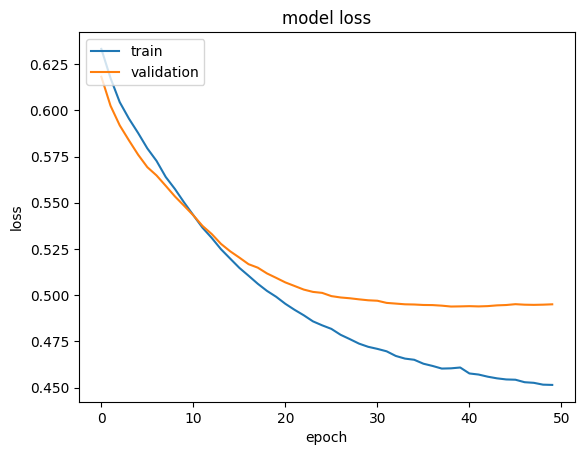

In [29]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

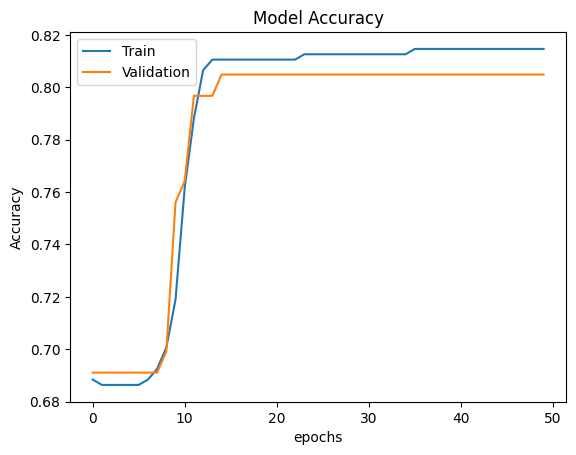

In [30]:
#plotting the accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()